# **Some genomics functions**

Here I show some of genomic functions I frequently use:

## Genetic code

Returns dictionary with standard Genetic Code. If ThreeLet is not explicited the amino acid format will be one-letter code (e.g. M, T, N); if ThreeLet=True the amino acid format will be three-letter code (e.g. Met, Thr, Asn).

In [5]:
def geneticCode(ThreeLet=False):
    GeneticCode={'UUU':'F', 'UUC':'F', 'UUA':'L', 'UUG':'L', 
                 'UCU':'S', 'UCC':'S', 'UCA':'S', 'UCG':'S', 
                 'UAU':'Y', 'UAC':'Y', 'UAA':None, 'UAG':None, 
                 'UGU':'C', 'UGC':'C', 'UGA':None, 'UGG':'W', 
                 'CUU':'L', 'CUC':'L', 'CUA':'L', 'CUG':'L',
                 'CCU':'P', 'CCC':'P', 'CCA':'P', 'CCG':'P',
                 'CAU':'H', 'CAC':'H', 'CAA':'Q', 'CAG':'Q',
                 'CGU':'R', 'CGC':'R', 'CGA':'R', 'CGG':'R',
                 'AUU':'I', 'AUC':'I', 'AUA':'I', 'AUG':'M',
                 'ACU':'T', 'ACC':'T', 'ACA':'T', 'ACG':'T',
                 'AAU':'N', 'AAC':'N', 'AAA':'K', 'AAG':'K',
                 'AGU':'S', 'AGC':'S', 'AGA':'R', 'AGG':'R',
                 'GUU':'V', 'GUC':'V', 'GUA':'V', 'GUG':'V',
                 'GCU':'A', 'GCC':'A', 'GCA':'A', 'GCG':'A',
                 'GAU':'D', 'GAC':'D', 'GAA':'E', 'GAG':'E',
                 'GGU':'G', 'GGC':'G', 'GGA':'G', 'GGG':'G'}
    if ThreeLet==True:
        aa={'Q': 'Gln', 'F': 'Phe', 'P': 'Pro', 'Y': 'Tyr', 'L': 'Leu', 
            'H': 'His', 'C': 'Cys', 'E': 'Glu', 'D': 'Asp', 'A': 'Ala', 
            'W': 'Trp', 'G': 'Gly', 'V': 'Val', 'R': 'Arg', 'T': 'Thr', 
            'N': 'Asn', 'K': 'Lys', 'M': 'Met', 'S': 'Ser', 'I': 'Ile'}
        for k,v in GeneticCode.items():
            if v==None:
                GeneticCode[k]=None
            else:
                GeneticCode[k]=aa[v]
    return GeneticCode

geneticCode()

{'UUU': 'F',
 'UUC': 'F',
 'UUA': 'L',
 'UUG': 'L',
 'UCU': 'S',
 'UCC': 'S',
 'UCA': 'S',
 'UCG': 'S',
 'UAU': 'Y',
 'UAC': 'Y',
 'UAA': None,
 'UAG': None,
 'UGU': 'C',
 'UGC': 'C',
 'UGA': None,
 'UGG': 'W',
 'CUU': 'L',
 'CUC': 'L',
 'CUA': 'L',
 'CUG': 'L',
 'CCU': 'P',
 'CCC': 'P',
 'CCA': 'P',
 'CCG': 'P',
 'CAU': 'H',
 'CAC': 'H',
 'CAA': 'Q',
 'CAG': 'Q',
 'CGU': 'R',
 'CGC': 'R',
 'CGA': 'R',
 'CGG': 'R',
 'AUU': 'I',
 'AUC': 'I',
 'AUA': 'I',
 'AUG': 'M',
 'ACU': 'T',
 'ACC': 'T',
 'ACA': 'T',
 'ACG': 'T',
 'AAU': 'N',
 'AAC': 'N',
 'AAA': 'K',
 'AAG': 'K',
 'AGU': 'S',
 'AGC': 'S',
 'AGA': 'R',
 'AGG': 'R',
 'GUU': 'V',
 'GUC': 'V',
 'GUA': 'V',
 'GUG': 'V',
 'GCU': 'A',
 'GCC': 'A',
 'GCA': 'A',
 'GCG': 'A',
 'GAU': 'D',
 'GAC': 'D',
 'GAA': 'E',
 'GAG': 'E',
 'GGU': 'G',
 'GGC': 'G',
 'GGA': 'G',
 'GGG': 'G'}

## Protein translation

It translates a nucleic acid sequence (RNA or a converted DNA) into a protein sequence until the end of sequence or until a stop codon.

In [8]:
def proteinTranslation(seq):
    '''it translates a nucleic acid sequence (RNA or a converted DNA) into a protein sequence until the end of sequence
    or until a stop codon'''
    genCode=geneticCode()
    RNAseq=seq.replace('T','U')
    i=0
    lproteinSeq=[]
    while i<(len(RNAseq)-2):
        codon=RNAseq[i:i+3]
        if genCode[codon]==None:
            break
        lproteinSeq.append(genCode[codon])
        i+=3
    proteinSeq=''.join(lproteinSeq)
    return proteinSeq

proteinTranslation('ATTGAATGTTCA')

'IECS'

## Molecular mass

It calculates the molecular mass of a DNA/RNA/protein sequence assuming normal isotopic ratios and protonation/modification states.


In [10]:
def molecularMass(seq,molType='protein'):
    if molType not in ['DNA','RNA','protein']:
        import sys
        print('Second argument (molType) must be \'DNA\',\'RNA\' or \'protein\'\nExample: molecularMass(seq=\'IRRMI\', molType=\'protein\')')
        sys.exit()
    molMasses={ 
            'DNA':{'A':323.21,'C':289.18,'G':329.21,'T':304.19},
            'RNA':{'A':329.21,'C':305.18,'G':345.21,'U':302.6},
            'protein':{'A': 71.07, 'C': 103.10, 'D': 115.08, 'E': 129.11, 'F': 147.17, 
                       'G': 57.05, 'H': 137.14, 'I': 113.15, 'K': 128.17, 'L': 113.15,
                       'M': 131.19, 'N': 114.08, 'P': 97.11, 'Q': 128.13, 'R': 156.18,
                       'S': 87.07, 'T': 101.1, 'V': 99.13, 'W': 186.20, 'Y': 163.17}}
    molMass=0
    lunknown=[]
    for let in seq:
        if let not in molMasses[molType]:
            lunknown.append(let)
        else:
            molMass+=molMasses[molType][let]
    if lunknown:
        for let in set(lunknown):
            numLet=lunknown.count(let)
            print('Unknown residue mass of \''+let+'\'')
            letMass=float(input('Input residue mass of \''+let+'\' if you know it (otherwise, input \'0\' and this residue will not be taken into account in final calculation): '))
            if letMass==0:
                print('The number of times residue \''+let+'\' appears in sequence is',numLet,'\n')
            numLet=lunknown.count(let)
            molMass+=letMass*numLet        
    return round(molMass,4)

molecularMass('IECS')

432.43

## GC content

Regions of a chromosome with high levels of nucleotides G and C frequently corresponds to gene regions. This function calculates this GC contents in a entire input seq or in windows of this input seq of our desired size (input in variable 'window'). In addition, we can visualize the evolution of GC contents of these subsequences (if variable 'view' is True).

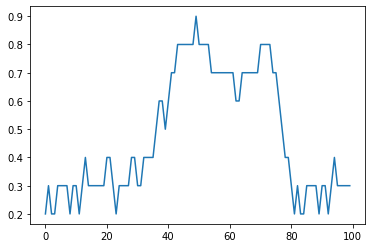

({'AGTTTATGTA': 0.2,
  'GTTTATGTAG': 0.3,
  'TTTATGTAGT': 0.2,
  'TTATGTAGTT': 0.2,
  'TATGTAGTTG': 0.3,
  'ATGTAGTTGT': 0.3,
  'TGTAGTTGTT': 0.3,
  'GTAGTTGTTA': 0.3,
  'TAGTTGTTAT': 0.2,
  'AGTTGTTATG': 0.3,
  'GTTGTTATGA': 0.3,
  'TTGTTATGAT': 0.2,
  'TGTTATGATG': 0.3,
  'GTTATGATGC': 0.4,
  'TTATGATGCT': 0.3,
  'TATGATGCTA': 0.3,
  'ATGATGCTAT': 0.3,
  'TGATGCTATT': 0.3,
  'GATGCTATTA': 0.3,
  'ATGCTATTAC': 0.3,
  'TGCTATTACC': 0.4,
  'GCTATTACCA': 0.4,
  'CTATTACCAT': 0.3,
  'TATTACCATT': 0.2,
  'ATTACCATTG': 0.3,
  'TTACCATTGT': 0.3,
  'TACCATTGTA': 0.3,
  'ACCATTGTAA': 0.3,
  'CCATTGTAAC': 0.4,
  'CATTGTAACC': 0.4,
  'ATTGTAACCA': 0.3,
  'TTGTAACCAT': 0.3,
  'TGTAACCATG': 0.4,
  'GTAACCATGT': 0.4,
  'TAACCATGTG': 0.4,
  'AACCATGTGA': 0.4,
  'ACCATGTGAC': 0.5,
  'CCATGTGACC': 0.6,
  'CATGTGACCG': 0.6,
  'ATGTGACCGT': 0.5,
  'TGTGACCGTG': 0.6,
  'GTGACCGTGG': 0.7,
  'TGACCGTGGC': 0.7,
  'GACCGTGGCC': 0.8,
  'ACCGTGGCCG': 0.8,
  'CCGTGGCCGT': 0.8,
  'CGTGGCCGTG': 0.8,
  'GTGGCCGTGG

In [55]:
def gcContent(seq,window=False,view=False):
    if window==False:
        window=len(seq)
    lGcContent=[]
    scoreGC=0
    mostGC=''
    dictKmersGC={}
    for i in range(len(seq)-window+1):
        kmer=seq[i:i+window]
        numGC=kmer.count('C')+kmer.count('G')
        propGC=float(numGC/len(kmer))
        lGcContent.append(round(propGC,3))
        dictKmersGC[kmer]=round(propGC,3)
        if propGC>scoreGC:
            scoreGC=propGC
            mostGC=kmer
    if view==True:
        from matplotlib import pyplot as plt
        plt.plot(lGcContent)
        plt.show()
    return dictKmersGC,mostGC,round(scoreGC,3)
    #lGcContent is a list with GC contents of each window considerated
    #mostGC is kmer with the biggest GC content
    #scoreGC is mostGC GC content

gcContent('AGTTTATGTAGTTGTTATGATGCTATTACCATTGTAACCATGTGACCGTGGCCGTGGCGTGGCATGGCGACTCGTCCGCCGAGTTTATGTAGTTGTTATGATGCTATTA',window=10,view=True)

In this example, the most probable gene region starts at position 40 and ends at 80